# Importing Necessary libraries

In [34]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical analysis
from scipy import stats

In [2]:
df1= pd.read_excel("godigt_cc_data.xlsx")

In [3]:
df1

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [7]:
df1.columns

Index(['userid', 'card_no', 'card_bin_no', 'Issuer', 'card_type',
       'card_source_date', 'high_networth', 'active_30', 'active_60',
       'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

## Here is my pick of top 5 important variables, along with the business justifications.

In [11]:
df1[['Issuer','T+1_month_activity','high_networth','Transactor_revolver','avg_spends_l3m']]

,Issuer,T+1_month_activity,high_networth,Transactor_revolver,avg_spends_l3m
0,Visa,0,B,T,27729
1,Visa,0,A,R,280854
2,Visa,1,C,R,70587
3,Visa,0,E,T,9156
4,Visa,1,B,T,38108
...,...,...,...,...,...
8443,Visa,0,A,T,108713
8444,Amex,0,A,T,42369
8445,Visa,0,D,T,8459
8446,Visa,1,C,T,57100


## 1.Card Issuer: The type of card plays a vital role in business context.

### Business justification: 

 Analysing and Understanding the various card distributed among the customers help us to provide the suitable   plans,offerings,and the marketing ideas for various card types, additional card benefits and the rewards will be additional drive for customers to be the long-lasting one.



In [12]:
df1['Issuer'].value_counts()

Issuer
Visa          7279
Mastercard     728
Amex           441
Name: count, dtype: int64

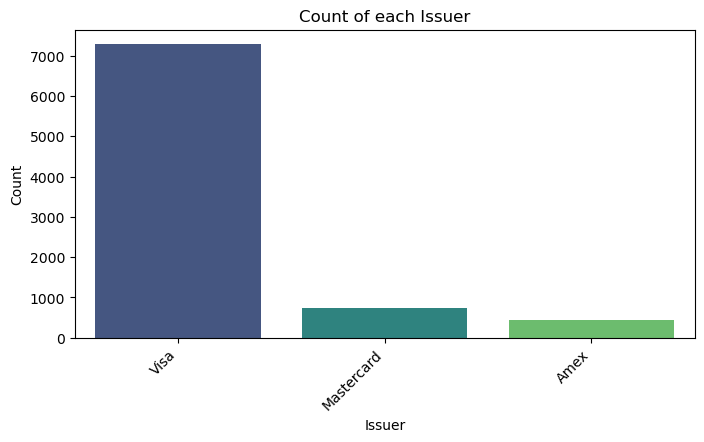

In [54]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Issuer', data=df1, palette='viridis', order=df1['Issuer'].value_counts().index)
plt.title('Count of each Issuer')
plt.xlabel('Issuer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

### There are 7279 visa cards and 728 Master cards and 441 Amex card issued.

## 2.T+1_month_activity :

### Business justification:

The activity at the initial stages of the issue of card is crucial,the reason i am picking this one is at the initial stages the rapport should be flawless with the customers in term of onboarding ,user ineterface,plans and involvement of user right after the card purchase will gives us the information to proceed further.Customer service and the customer loyalty are important factors during the intial stages.



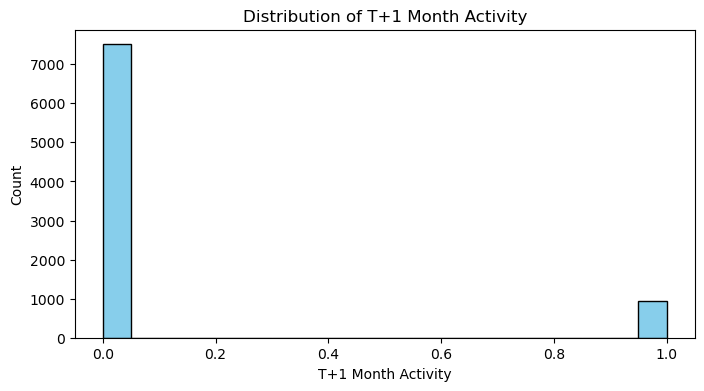

In [55]:
plt.figure(figsize=(8, 4))
plt.hist(df1['T+1_month_activity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of T+1 Month Activity')
plt.xlabel('T+1 Month Activity')
plt.ylabel('Count')
plt.show()

## 3.High_networth :

### Business justification:

The networth will defines the customer about what are their potential and what are plans that can work well for them and the risk analysis in the plans,the people will higher net worth can be driven to business ideas and the growth of their welfare side by side with influence a lot in this category.


In [29]:
df1['high_networth'].value_counts()

high_networth
A    1740
D    1696
E    1693
B    1660
C    1659
Name: count, dtype: int64

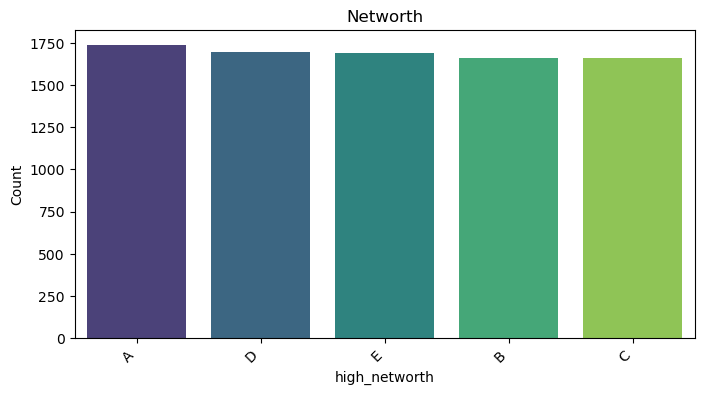

In [56]:
plt.figure(figsize=(8, 4))
sns.countplot(x='high_networth', data=df1, palette='viridis', order=df1['high_networth'].value_counts().index)
plt.title('Networth')
plt.xlabel('high_networth')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## 4.Transactor_revolver 

### Business justification:

The transactor and the revolver is important in risk analysis and management by identifying the type we can decide the suitable palns they may work and the risks in the revolver category can also be minimized.


In [30]:
df1['Transactor_revolver'].value_counts()

Transactor_revolver
T    7115
R    1295
Name: count, dtype: int64

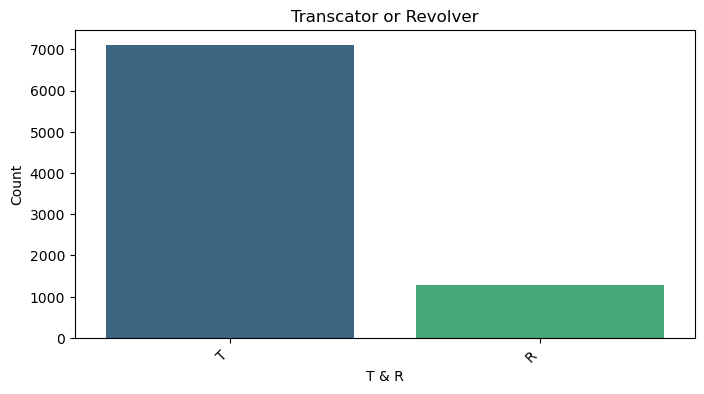

In [57]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Transactor_revolver', data=df1, palette='viridis', order=df1['Transactor_revolver'].value_counts().index)
plt.title('Transcator or Revolver')
plt.xlabel('T & R')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#### There are 7115 Transactors of minimum risks and 1295 Revolvers risk analysis should done before approving new plans.

## 5. Avg_spends_l3m   :

###  Business justification:

The average amount spend in the last three months will gives us a brief overview of the potential of the customer , risk involved in the process,ensuring they having the better experience and what will be plans that suit their needs everything can be derived from it.

In [33]:
df1['avg_spends_l3m'].describe()

count      8448.000000
mean      49527.365530
std       46244.954836
min           0.000000
25%       17110.000000
50%       37943.000000
75%       66095.750000
max      289292.000000
Name: avg_spends_l3m, dtype: float64

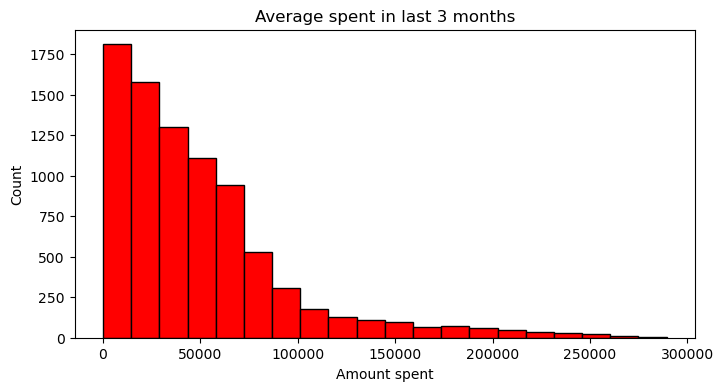

In [58]:
plt.figure(figsize=(8, 4))
plt.hist(df1['avg_spends_l3m'], bins=20, color='red', edgecolor='black')
plt.title('Average spent in last 3 months')
plt.xlabel('Amount spent')
plt.ylabel('Count')
plt.show()

#### The average amount spend by the customers in the last three months is 49527, so that we can suggest or introduce new plans according to the capabalities.The maximum amount spent in last three months is  289292.

### These are the business justifications and the top 5 important variables in my opinion